In [70]:
import numpy as np
import matplotlib.pyplot as plt

$$(i) \frac{\partial s}{\partial t} = k\frac{\partial^2 s}{\partial x^2} +\frac{Q}{A}\frac{\partial s}{\partial x}$$

$$(ii) \frac{\partial \zeta}{\partial t} = \kappa \frac{\partial^2 \zeta}{\partial r^2} + \frac{1}{r} \left (\kappa-\frac{Q}{\pi} \right )\frac{\partial \zeta}{\partial r}$$

In [178]:
Q = 150  # m/s^3
A = 2000 # m^2
k = 400
kappa = k
R = 10000
L = 10000

pi = np.pi

a = A/pi

 ## Steady-state  
   
for i: $$ 0 = k\frac{\partial^2 \tilde{s}}{\partial x^2} +\frac{Q}{A} \frac{\partial \tilde{s}}{\partial x} $$
such that $$\tilde{s}(x) = \gamma_1 e^{-\frac{Q}{kA}x} + \gamma_2$$

for ii: $$ 0 = \kappa \frac{\partial^2 \tilde{\zeta}}{\partial r^2} + \frac{1}{r}\left(\kappa - \frac{Q}{\pi} \right )\frac{\partial \tilde{\zeta}}{\partial r}$$
such that $$\tilde{\zeta}(r) = \gamma_3 \left(  \frac{r}{R}\right)^{Q/\kappa \pi} + \gamma_4$$
 
  
Finally by using the boundary conditions we find:
$$\tilde{s}(x) = \left(\frac{a}{R}\right)^{Q/\kappa \pi} e^{-\frac{Q}{kA}x}$$
$$\tilde{\zeta}(r) = \left(  \frac{r}{R}\right)^{Q/\kappa \pi}$$

In [179]:
def s_tilde(x):
    return (a/R)**(Q/(kappa*pi))*np.exp(-Q*x/(k*A))

def zeta_tilde(r):
    return (r/R)**(Q/(kappa*pi))

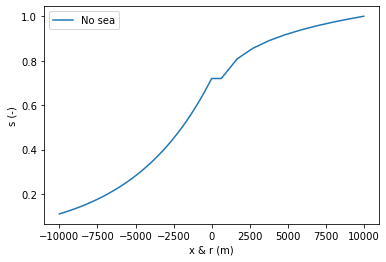

In [180]:
x = np.linspace(0,L,int(1e3))
r = np.linspace(a,R,int(1e1))

ax = np.append(-x[::-1],r)

s0 = [s_tilde(x) for x in x][::-1] + [zeta_tilde(r) for r in r]


plt.figure()
plt.plot(ax,s0, label='No sea')
plt.xlabel('x & r (m)')
plt.ylabel('s (-)')
#plt.vlines(B,0,1, color='black')
plt.legend()
plt.show()

## Non-steady state

Let's first consider the non-steady state of the radial part with two non-homogenous boundary conditions.
Then for ii: $$\frac{\partial \zeta}{\partial t} = \kappa \frac{\partial^2 \zeta}{\partial r^2} + \frac{1}{r} \left (\kappa-\frac{Q}{\pi} \right )\frac{\partial \zeta}{\partial r}$$
The boundary conditions are 
$$\begin{aligned} \zeta(R) &= 1  \\
\zeta(a) &= f(t)\end{aligned}$$


We now consider $$\zeta(r,t) = v(r,t) + \psi(r,t)$$  with $\psi$ chosen such that the boundary conditions become homogenous $$\psi(r,t) = \frac{f(t)-1}{a-R}r + \frac{Rf(t) -a}{R-a}$$

The the equation for $v$ is: $$ v_t = \kappa v_{rr} + \frac{1}{r} \left(\kappa -\frac{Q}{\pi}\right) v_r + \left[ -\psi_t + \kappa \psi_{rr} + \frac{1}{r} \left(\kappa -\frac{Q}{\pi}\right) \psi_r \right]$$

which we rewrite as $$ v_t = \kappa v_{rr} + \frac{c}{r} v_r + H(r,t)$$ where the boundary conditions for $v$ are homogenous.

### Eigenvalue problem
The Eigenvalue problem related to this PDE is:
$$ \kappa \phi_{rr} + \frac{c}{r} \phi_r = -\lambda \phi$$
Now a true mathematician would work out the series solution using the method of Frobenius. I however use wolfram_alpha to give me:
$$\phi(r) = d_1 r^{\frac{\kappa -c}{2\kappa}} J_{\frac{c-\kappa}{2\kappa}}\left(\sqrt{\frac{\lambda}{\kappa}}r \right) +  d_2 r^{\frac{\kappa -c}{2\kappa}} Y_{\frac{c-\kappa}{2\kappa}}\left(\sqrt{\frac{\lambda}{\kappa}}r\right)$$


### Eigenfunction expansion
Now that we have the eigenfunctions we can use eigenfunction expansion:
$$v(r,t) = \sum_{n=1}^{\infty}T_n(t) \phi_n(r)$$
  
By filling this in into the equation, justifying differentiation by homogeneity of the boundary conditions, and integrating from $r=a$ to $r=R$, using (ASSUMED) orthogonality:

$$\frac{dT_n}{dt} = -\lambda_n T_n(t) + \int_{r=a}^R H(r,t) \phi_n(r) dr $$ resulting in $$T_n(t) = e^{-\lambda_n t} T_n(0) + e^{-\lambda_n t} \int_{0}^{t} h_n(\tau)e^{\lambda_n \tau} d\tau$$
where $T_n(0) = \int v(r,0) \phi_n(r) dr$

In [185]:
from scipy.special import jv
from scipy.special import yv

def f(t):
    return 1+0.5*np.sin(t)

def f_prime(t):
    return 0.5*np.cos(t)

def zeta_0(r):
    return np.exp(r/R)

order = (Q/pi)/(2*kappa)
print(order)

def psi(r,t):
    return (f(t)-1)/(a-R)*r + (R*f(t)-a)/(R-a)

def H(r,t):
    psi_t = f_prime(t)*r/(a-R) + R*f_prime(t)/(R-a)
    psi_rr = 0
    psi_r = (f(t)-1)/(a-R)
    return -psi_t + kappa*psi_rr + (kappa-Q/pi)/r*psi_r

N = 6
z = np.array([2.5,5,8,12,15,18])

from scipy.optimize import root
zr = np.array([root(lambda x: jv(order,x), n).x[0] for n in z])

l = (zr/(R-a))**2*kappa

def phi(r,n):
    return (r-a)**(-order)*jv(order, np.sqrt(l[n-1]/kappa)*(r-a))

0.05968310365946075


<ipython-input-181-337e06dbaefc>:33: RuntimeWarning: divide by zero encountered in double_scalars
  return (r-a)**(-order)*jv(order, np.sqrt(l[n-1]/kappa)*(r-a))
<ipython-input-181-337e06dbaefc>:33: RuntimeWarning: invalid value encountered in double_scalars
  return (r-a)**(-order)*jv(order, np.sqrt(l[n-1]/kappa)*(r-a))


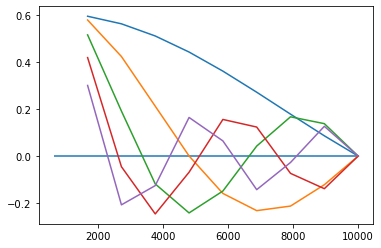

In [182]:
B = [[phi(r,n) for r in r] for n in range(1,6)]

plt.figure()
for i in range(len(B)):
    plt.plot(r,B[i])
plt.hlines(0,a,R)
plt.show()

In [183]:
import scipy.integrate as integrate
def h(tau,n):
    return integrate.quad(lambda x: H(x,tau)*phi(x,n), a, R)[0]

def T0(n):
    return 0

def T(t,n):
    return np.exp(-l[n-1]*t)*T0(n) + np.exp(-l[n-1]*t) * integrate.quad(lambda x: h(x, n)*np.exp(l[n-1]*x), 0, t)[0]

def zeta_sol(r,t):
    res = 0
    for i in range(1,N):
        res += T(t,i)*phi(r,i)
    return res + psi(r,t)

In [184]:
sol = [[zeta_sol(r,t) for r in r] for t in np.linspace(0,3,10)]

plt.figure()
for i in range(len(sol)):
    plt.plot(r,sol[i], label=str(i))
plt.legend()
plt.vlines(a,0,1)
plt.show()

<ipython-input-181-337e06dbaefc>:33: RuntimeWarning: divide by zero encountered in double_scalars
  return (r-a)**(-order)*jv(order, np.sqrt(l[n-1]/kappa)*(r-a))
<ipython-input-181-337e06dbaefc>:33: RuntimeWarning: invalid value encountered in double_scalars
  return (r-a)**(-order)*jv(order, np.sqrt(l[n-1]/kappa)*(r-a))


KeyboardInterrupt: 

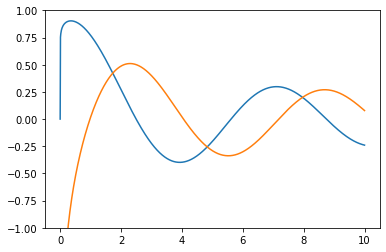

In [189]:
x = np.linspace(0,10, 1000)

plt.figure()
plt.plot(x, jv(order,x))
plt.plot(x, yv(order,x))
plt.ylim(-1,1)
plt.show()